<a href="https://colab.research.google.com/github/gyujin0450/RPRG_PartII/blob/master/p210_%EB%B3%80%EC%88%98%EA%B0%84%EC%9D%98%EA%B4%80%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ch06.6 변수간의 관계 분석

In [7]:
# 범주형 vs 범주형 데이터 분포 시각화
# https://www.v1rus.com/entry/RStudio-RStudio-mac%EC%97%90%EC%84%9C-%EC%9D%B8%EC%BD%94%EB%94%A9-%EC%97%90%EB%9F%ACreadcsv
new_data <- read.csv("new_data.csv", header = TRUE, na = "-", fileEncoding = "CP949", encoding = "UTF-8")
str(new_data)

'data.frame':	231 obs. of  15 variables:
 $ resident : int  1 2 4 5 3 2 2 5 3 1 ...
 $ gender   : int  1 1 2 1 1 2 1 2 1 1 ...
 $ job      : chr  "1" "2" "NA" "3" ...
 $ age      : chr  "26" "54" "45" "62" ...
 $ position : chr  "4" "1" "2" "1" ...
 $ price    : num  5.1 4.2 3.5 5 5.4 4.1 4.9 2.3 4.2 6.7 ...
 $ survey   : int  5 4 4 5 4 2 3 1 3 4 ...
 $ price2   : num  5.1 4.2 3.5 5 5.4 4.1 4.9 2.3 4.2 6.7 ...
 $ price3   : num  5.1 4.2 3.5 5 5.4 4.1 4.9 2.3 4.2 6.7 ...
 $ resident2: chr  "1.서울특별시" "2.인천광역시" "4.대구광역시" "5.시구군" ...
 $ job2     : chr  "공무원" "회사원" "NA" "개인사업" ...
 $ age2     : chr  "청년층" "중년층" "중년층" "장년층" ...
 $ position2: chr  "4급" "1급" "2급" "1급" ...
 $ gender2  : chr  "남자" "남자" "여자" "남자" ...
 $ age3     : chr  "1" "2" "2" "3" ...


In [8]:
# 코딩변경된 거주지역과 성별 대상으로 빈도수 구하기
resident_gender <- table(new_data$resident2, new_data$gender2)
resident_gender

              
               남자 여자
  1.서울특별시   67   43
  2.인천광역시   26   20
  3.대전광역시   16   10
  4.대구광역시    6    9
  5.시구군       19   15

In [9]:
gender_resident <- table(new_data$gender2, new_data$resident2)
gender_resident

      
       1.서울특별시 2.인천광역시 3.대전광역시 4.대구광역시 5.시구군
  남자           67           26           16            6       19
  여자           43           20           10            9       15

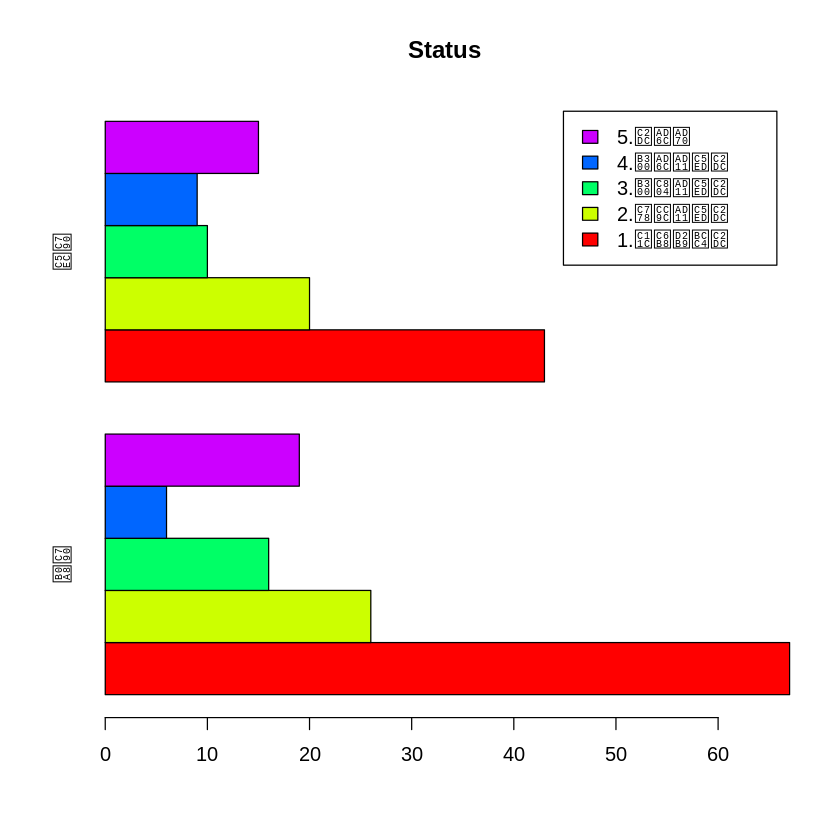

In [10]:
# 성별에 따른 거주지역의 분포 현황 시각화
barplot( resident_gender, beside = T, horiz = T, col = rainbow(5),
         legend = row.names(resident_gender), main = "Status")

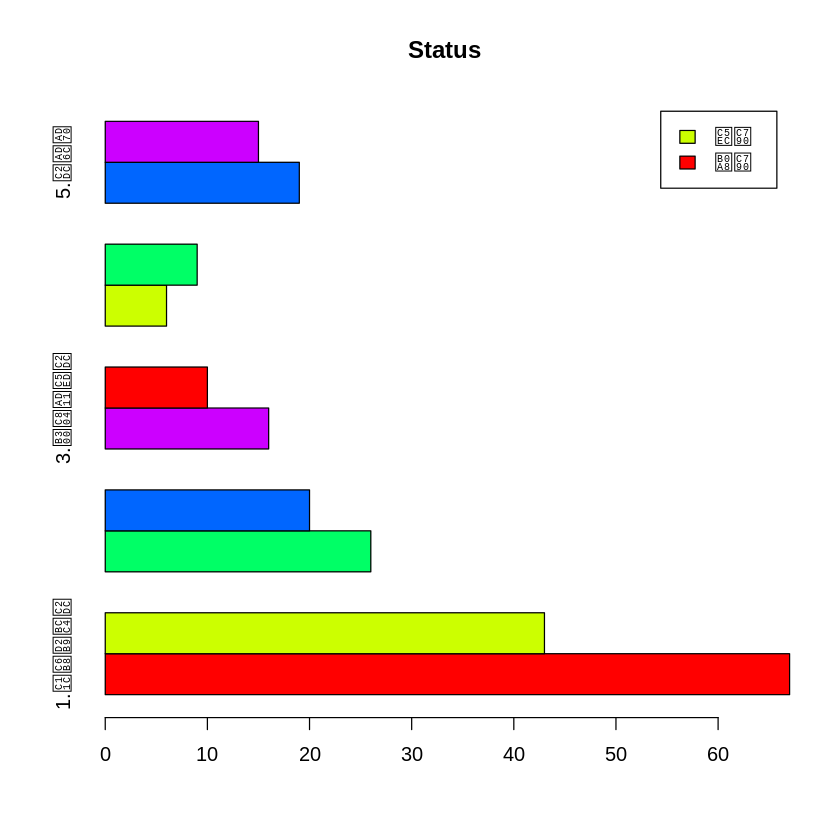

In [12]:
# 거주지역에 따른 성별의 분포 현황 시각화
barplot( gender_resident, beside = T, horiz = T, col = rainbow(5),
         legend = row.names(gender_resident), main = 'Status')

In [13]:
# 연속형 vs 범주형 데이터의 시각화
# 1) lattice 패키지 설치와 메모리 로딩 및 데이터 준비
install.packages("lattice") 
library(lattice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
new_data$age

[1] "26" "54" "45" "62" "57" "36" "37" "29" "35" "56" "20" "49" "49" "49" "25"
 [16] "57" "56" "21" "69" "63" "34" "26" "38" "57" "49" "65" "49" "23" "63" "45"
 [31] "29" "28" "60" "32" "NA" "38" "65" "NA" "24" "61" "41" "63" "30" "37" "29"
 [46] "NA" "25" "36" "47" "64" "28" "24" "62" "28" "63" "26" "40" "52" "NA" "43"
 [61] "44" "41" "54" "44" "31" "49" "64" "65" "46" "42" "38" "65" "40" "40" "55"
 [76] "41" "43" "NA" "47" "45" "44" "27" "37" "35" "69" "20" "NA" "20" "24" "46"
 [91] "25" "NA" "21" "33" "56" "45" "60" "38" "41" "27" "37" "20" "49" "49" "21"
[106] "69" "63" "34" "26" "38" "57" "60" "49" "65" "49" "23" "63" "45" "29" "28"
[121] "65" "60" "32" "NA" "38" "65" "NA" "24" "61" "41" "63" "30" "37" "29" "NA"
[136] "25" "36" "47" "64" "28" "62" "28" "63" "26" "40" "52" "NA" "43" "44" "30"
[151] "41" "54" "44" "31" "49" "64" "65" "46" "42" "38" "65" "40" "42" "40" "55"
[166] "41" "45" "43" "NA" "63" "47" "45" "44" "27" "37" "35" "69" "20" "NA" "20"
[181] "24" "46" "25" "NA" "21" "48" "22" "48" "21" "64" "27" "64" "54" "42" "54"
[196] "25" "54" "63" "21" "23" "33" "60" "38" "63" "20" "60" "20" "24" "46" "25"
[211] "50" "21" "64" "27" "54" "54" "25" "54" "63" "21" "23" "41" "27" "48" "48"
[226] "21" "43" "20" "24" "59" "27"

In [26]:
# 결측치 제거
new_data2 <- subset(new_data, new_data$age != "NA" & new_data$job2 != "NA")
new_data2$age

[1] "26" "54" "62" "57" "36" "37" "35" "56" "20" "49" "49" "49" "25" "57" "21"
 [16] "69" "63" "34" "26" "38" "57" "49" "65" "49" "23" "63" "45" "29" "28" "60"
 [31] "32" "38" "65" "24" "61" "41" "63" "30" "37" "29" "25" "36" "47" "64" "28"
 [46] "24" "62" "28" "63" "40" "52" "43" "44" "41" "54" "44" "31" "49" "64" "65"
 [61] "46" "42" "38" "65" "40" "40" "55" "41" "43" "45" "44" "27" "37" "35" "69"
 [76] "20" "20" "24" "46" "25" "21" "33" "56" "45" "60" "38" "41" "27" "37" "20"
 [91] "49" "49" "21" "69" "63" "34" "26" "38" "57" "60" "49" "65" "49" "23" "63"
[106] "45" "29" "28" "60" "32" "38" "65" "24" "61" "41" "63" "30" "37" "29" "25"
[121] "36" "47" "64" "28" "62" "28" "63" "40" "52" "43" "44" "30" "41" "54" "44"
[136] "31" "49" "64" "65" "46" "42" "38" "65" "40" "42" "40" "55" "41" "45" "43"
[151] "63" "45" "44" "27" "37" "35" "69" "20" "20" "24" "46" "25" "21" "48" "22"
[166] "48" "21" "64" "64" "54" "42" "54" "54" "63" "21" "23" "33" "60" "38" "63"
[181] "20" "60" "20" "24" "46" "25" "50" "21" "64" "54" "54" "54" "63" "21" "23"
[196] "41" "27" "48" "48" "21" "43" "20" "24" "59" "27"

In [27]:
new_data2$job2

[1] "공무원"   "회사원"   "개인사업" "회사원"   "공무원"   "회사원"  
  [7] "개인사업" "공무원"   "개인사업" "공무원"   "회사원"   "개인사업"
 [13] "회사원"   "공무원"   "개인사업" "공무원"   "회사원"   "개인사업"
 [19] "공무원"   "회사원"   "공무원"   "회사원"   "공무원"   "공무원"  
 [25] "개인사업" "공무원"   "회사원"   "공무원"   "개인사업" "공무원"  
 [31] "회사원"   "개인사업" "개인사업" "회사원"   "회사원"   "회사원"  
 [37] "공무원"   "개인사업" "회사원"   "공무원"   "회사원"   "회사원"  
 [43] "공무원"   "개인사업" "회사원"   "회사원"   "공무원"   "개인사업"
 [49] "회사원"   "개인사업" "회사원"   "회사원"   "개인사업" "공무원"  
 [55] "회사원"   "개인사업" "회사원"   "회사원"   "공무원"   "개인사업"
 [61] "회사원"   "회사원"   "공무원"   "개인사업" "공무원"   "회사원"  
 [67] "개인사업" "회사원"   "회사원"   "개인사업" "공무원"   "회사원"  
 [73] "개인사업" "개인사업" "개인사업" "회사원"   "개인사업" "공무원"  
 [79] "회사원"   "개인사업" "공무원"   "회사원"   "개인사업" "개인사업"
 [85] "개인사업" "공무원"   "회사원"   "개인사업" "회사원"   "개인사업"
 [91] "공무원"   "회사원"   "개인사업" "공무원"   "회사원"   "개인사업"
 [97] "공무원"   "회사원"   "공무원"   "공무원"   "회사원"   "공무원"  
[103] "공무원"   "개인사업" "공무원"   "회사원"   "공무원"   "개인사업"
[109] "공무원"   "회사원"   "개인사업" "개인사업" "회사원"   "회사원"  
[115] "회사원"   "공무원"   "개인사업" "회사원"   "공무원"   "회사원"  
[121] "회사원"   "공무원"   "개인사업" "회사원"   "공무원"   "개인사업"
[127] "회사원"   "개인사업" "회사원"   "회사원"   "개인사업" "회사원"  
[133] "공무원"   "회사원"   "개인사업" "회사원"   "회사원"   "공무원"  
[139] "개인사업" "회사원"   "회사원"   "공무원"   "개인사업" "공무원"  
[145] "공무원"   "회사원"   "개인사업" "회사원"   "개인사업" "회사원"  
[151] "개인사업" "개인사업" "공무원"   "회사원"   "개인사업" "개인사업"
[157] "개인사업" "회사원"   "개인사업" "공무원"   "회사원"   "개인사업"
[163] "공무원"   "회사원"   "개인사업" "공무원"   "개인사업" "회사원"  
[169] "공무원"   "개인사업" "개인사업" "개인사업" "개인사업" "회사원"  
[175] "개인사업" "개인사업" "회사원"   "개인사업" "공무원"   "개인사업"
[181] "회사원"   "개인사업" "개인사업" "공무원"   "회사원"   "개인사업"
[187] "개인사업" "공무원"   "회사원"   "개인사업" "개인사업" "개인사업"
[193] "회사원"   "개인사업" "개인사업" "회사원"   "개인사업" "회사원"  
[199] "공무원"   "개인사업" "회사원"   "공무원"   "개인사업" "개인사업"
[205] "개인사업"

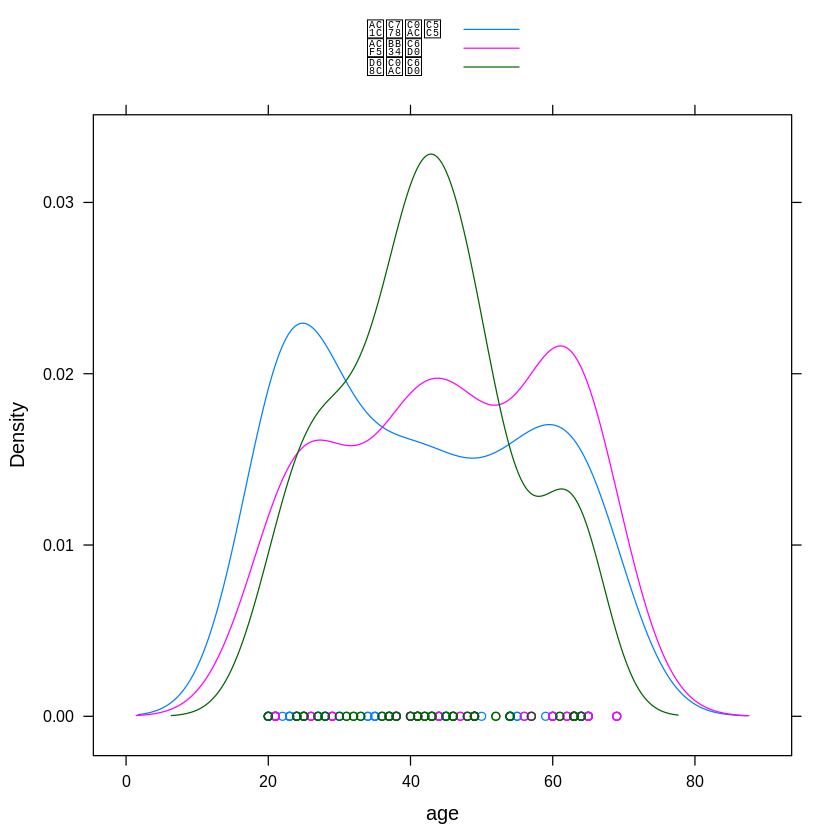

In [28]:
# 2) 직업 유형에 따른 나이 분포 현황
densityplot(~ age, data = new_data2, groups = job2,
    # plot.points = T : 밀도, auto.key = T : 범례
    plot.points = T, auto.key = T
    )

In [35]:
# 결측치 제거
new_data3 <- subset(new_data, new_data$position2 != "NA" )

In [36]:
new_data3$position2

[1] "4급" "1급" "2급" "1급" "3급" "3급" "4급" "4급" "1급" "5급" "2급" "2급"
 [13] "2급" "5급" "1급" "1급" "5급" "1급" "1급" "4급" "4급" "3급" "1급" "2급"
 [25] "1급" "2급" "5급" "1급" "2급" "4급" "4급" "1급" "4급" "1급" "3급" "1급"
 [37] "5급" "1급" "2급" "1급" "4급" "3급" "4급" "1급" "5급" "3급" "2급" "1급"
 [49] "5급" "1급" "4급" "1급" "4급" "3급" "1급" "4급" "2급" "2급" "2급" "1급"
 [61] "2급" "4급" "2급" "1급" "1급" "2급" "2급" "3급" "3급" "3급" "1급" "2급"
 [73] "2급" "3급" "2급" "2급" "2급" "4급" "3급" "4급" "1급" "5급" "1급" "5급"
 [85] "5급" "2급" "5급" "2급" "5급" "4급" "1급" "2급" "1급" "3급" "2급" "4급"
 [97] "3급" "5급" "2급" "2급" "5급" "1급" "1급" "4급" "4급" "3급" "1급" "1급"
[109] "2급" "1급" "2급" "5급" "1급" "2급" "4급" "4급" "1급" "1급" "4급" "1급"
[121] "3급" "1급" "5급" "1급" "2급" "1급" "4급" "3급" "4급" "1급" "5급" "3급"
[133] "2급" "1급" "1급" "4급" "1급" "4급" "3급" "1급" "4급" "2급" "2급" "2급"
[145] "1급" "2급" "4급" "2급" "1급" "1급" "2급" "2급" "3급" "3급" "2급" "3급"
[157] "1급" "2급" "2급" "2급" "3급" "1급" "2급" "2급" "2급" "4급" "3급" "4급"
[169] "1급" "5급" "1급" "5급" "5급" "2급" "5급" "2급" "5급" "2급" "5급" "2급"
[181] "5급" "1급" "4급" "1급" "2급" "1급" "1급" "1급" "5급" "5급" "4급" "1급"
[193] "3급" "1급" "5급" "1급" "5급" "5급" "2급" "5급" "2급" "5급" "1급" "4급"
[205] "1급" "1급" "1급" "1급" "5급" "5급" "2급" "4급" "2급" "2급" "5급" "2급"
[217] "5급" "5급" "1급" "4급"

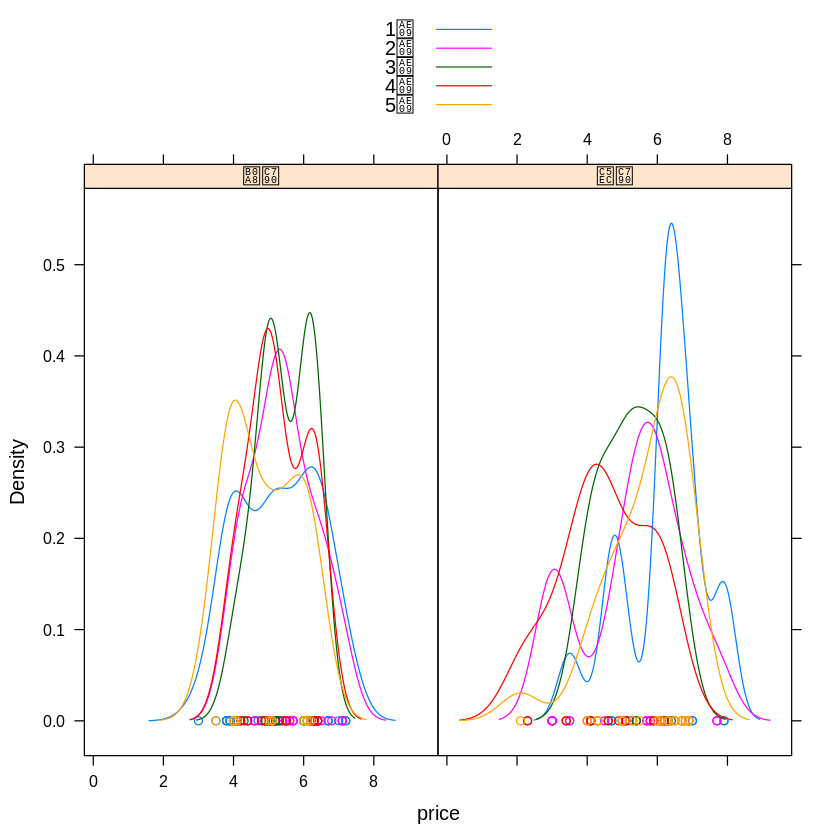

In [38]:
# 연속형 vs 범주형 vs 범주형
# 비율척도인 연속형 변수(구매비용), 범주형 변수(성별), 다른 범주형 변수(서열)를 대상으로 사간화
# 1) 성별에 따른 직급별 구매비용 분석
densityplot(~ price | factor(gender2), data = new_data3, group = position2,
      plot.points = T, auto.key = T)

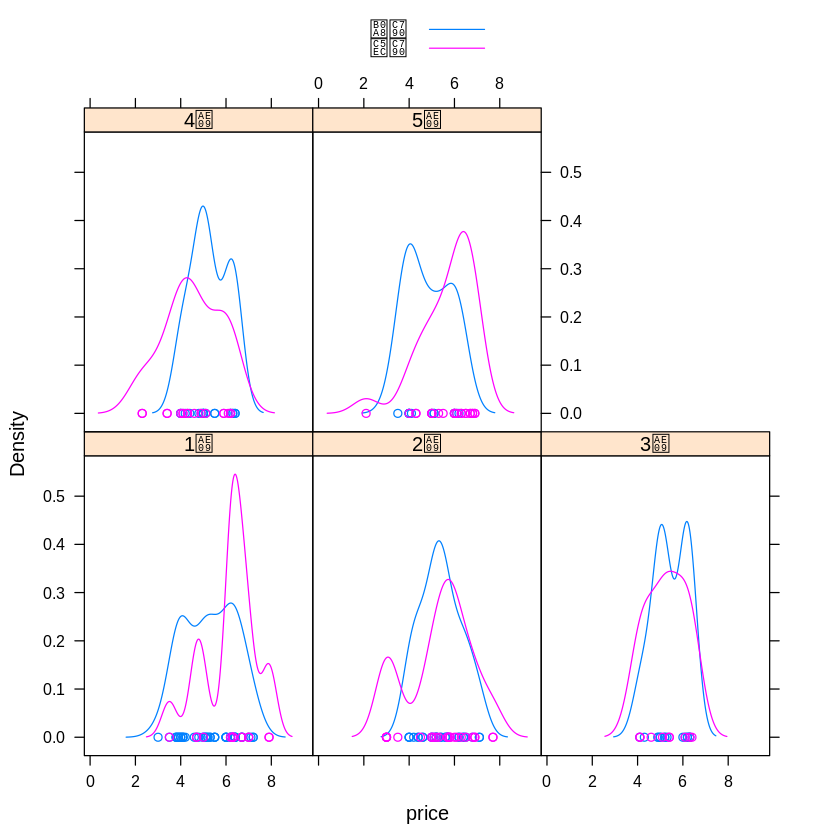

In [39]:
# 2) 직급에 따른 성별 구매비용 분석
densityplot(~ price | factor(position2), data = new_data3, groups = gender2,
      plot.points = T, auto.key = T)

In [46]:
new_data2$price

[1] 5.1 4.2 5.0 5.4 4.1 4.9 4.2 6.7 4.3 5.7 4.6 5.1 2.1 5.1 5.1 4.1 4.1 2.3
 [19] 5.0 5.2 4.7 4.4 5.2 6.3 4.0 5.3 4.2 4.1 5.0 7.1 4.0 5.3 4.7 6.2 7.0 6.4
 [37] 5.1 5.5 6.4 6.3 4.1 4.1 5.0 3.5 3.3 6.3 6.2 6.2 6.3 6.3 3.5 3.0 6.8 5.2
 [55] 5.5 6.1 6.1 5.4 6.0 6.7 5.2 5.6 5.1 5.5 6.1 5.0 4.0 5.7 5.7 5.0 6.5 4.9
 [73] 6.2 4.6 7.2 6.5 6.8 5.5 5.8 4.0 6.7 4.3 5.0 4.0 6.7 5.4 6.2 5.9 4.9 4.3
 [91] 5.7 4.0 5.1 3.8 4.1 5.1 5.0 5.2 4.7 5.1 4.4 5.2 5.0 4.0 3.9 4.0 4.1 5.0
[109] 4.0 4.0 6.0 3.0 5.0 7.0 6.4 6.2 5.5 4.3 4.8 6.0 4.1 5.0 4.0 3.3 5.3 6.2
[127] 4.6 6.3 6.3 3.0 6.8 5.0 5.2 5.5 3.0 6.3 5.4 6.0 6.7 5.2 5.6 4.6 5.5 6.1
[145] 5.3 5.0 6.0 5.7 4.6 5.7 6.3 5.2 6.5 4.9 6.2 4.0 7.2 6.5 6.8 5.0 5.8 6.0
[163] 6.7 6.9 4.0 7.7 5.3 4.8 6.0 6.4 5.1 7.9 6.3 6.3 6.0 6.9 4.3 6.7 5.4 7.0
[181] 6.0 6.2 6.1 5.0 5.8 4.0 3.0 5.0 6.0 6.4 7.9 6.3 6.3 6.0 6.9 6.2 5.9 6.9
[199] 7.7 6.3 4.5 3.5 6.1 5.5 4.4

In [45]:
new_data2$age

[1] "26" "54" "62" "57" "36" "37" "35" "56" "20" "49" "49" "49" "25" "57" "21"
 [16] "69" "63" "34" "26" "38" "57" "49" "65" "49" "23" "63" "45" "29" "28" "60"
 [31] "32" "38" "65" "24" "61" "41" "63" "30" "37" "29" "25" "36" "47" "64" "28"
 [46] "24" "62" "28" "63" "40" "52" "43" "44" "41" "54" "44" "31" "49" "64" "65"
 [61] "46" "42" "38" "65" "40" "40" "55" "41" "43" "45" "44" "27" "37" "35" "69"
 [76] "20" "20" "24" "46" "25" "21" "33" "56" "45" "60" "38" "41" "27" "37" "20"
 [91] "49" "49" "21" "69" "63" "34" "26" "38" "57" "60" "49" "65" "49" "23" "63"
[106] "45" "29" "28" "60" "32" "38" "65" "24" "61" "41" "63" "30" "37" "29" "25"
[121] "36" "47" "64" "28" "62" "28" "63" "40" "52" "43" "44" "30" "41" "54" "44"
[136] "31" "49" "64" "65" "46" "42" "38" "65" "40" "42" "40" "55" "41" "45" "43"
[151] "63" "45" "44" "27" "37" "35" "69" "20" "20" "24" "46" "25" "21" "48" "22"
[166] "48" "21" "64" "64" "54" "42" "54" "54" "63" "21" "23" "33" "60" "38" "63"
[181] "20" "60" "20" "24" "46" "25" "50" "21" "64" "54" "54" "54" "63" "21" "23"
[196] "41" "27" "48" "48" "21" "43" "20" "24" "59" "27"

In [48]:
new_data2$gender2

[1] "남자" "남자" "남자" "남자" "여자" "남자" "남자" "남자" "여자" "남자"
 [11] "남자" "남자" "여자" "남자" "남자" "남자" "남자" "여자" "남자" "남자"
 [21] "여자" "남자" "남자" "여자" "남자" "남자" "남자" "여자" "남자" "남자"
 [31] "남자" "남자" "남자" "남자" "여자" "남자" "남자" "남자" "여자" "남자"
 [41] "남자" "여자" "남자" "남자" "여자" "여자" "여자" "남자" "여자" "남자"
 [51] "여자" "여자" "여자" "남자" "남자" "여자" "여자" "남자" "남자" "남자"
 [61] "여자" "남자" "여자" "여자" "여자" "남자" "남자" "여자" "여자" "여자"
 [71] "여자" "여자" "남자" "여자" "남자" "여자" "여자" "여자" "여자" "남자"
 [81] "여자" "여자" "여자" "남자" "여자" "여자" "남자" "여자" "남자" "여자"
 [91] "남자" "남자" "남자" "남자" "남자" "여자" "남자" "남자" "여자" "남자"
[101] "남자" "남자" "여자" "남자" "남자" "남자" "여자" "남자" "남자" "남자"
[111] "남자" "남자" "남자" "남자" "남자" "남자" "남자" "남자" "남자" "남자"
[121] "남자" "남자" "남자" "여자" "남자" "남자" "남자" "남자" "남자" "여자"
[131] "남자" "여자" "남자" "남자" "여자" "남자" "남자" "남자" "남자" "남자"
[141] "남자" "여자" "남자" "남자" "여자" "남자" "남자" "남자" "남자" "여자"
[151] "남자" "남자" "남자" "남자" "남자" "여자" "남자" "여자" "여자" "여자"
[161] "여자" "남자" "여자" "여자" "여자" "여자" "여자" "남자" "여자" "남자"
[171] "여자" "여자" "여자" "여자" "여자" "여자" "여자" "여자" "여자" "여자"
[181] "여자" "남자" "여자" "여자" "여자" "남자" "여자" "여자" "남자" "남자"
[191] "여자" "여자" "여자" "여자" "여자" "남자" "여자" "여자" "여자" "여자"
[201] "여자" "남자" "남자" "남자" "남자"

In [49]:
summary(new_data2)

    resident       gender          job                age           
 Min.   :1.0   Min.   :1.000   Length:205         Length:205        
 1st Qu.:1.0   1st Qu.:1.000   Class :character   Class :character  
 Median :2.0   Median :1.000   Mode  :character   Mode  :character  
 Mean   :2.2   Mean   :1.429                                        
 3rd Qu.:3.0   3rd Qu.:2.000                                        
 Max.   :5.0   Max.   :2.000                                        
   position             price           survey          price2     
 Length:205         Min.   :2.100   Min.   :1.000   Min.   :2.100  
 Class :character   1st Qu.:4.600   1st Qu.:3.000   1st Qu.:4.600  
 Mode  :character   Median :5.300   Median :3.000   Median :5.300  
                    Mean   :5.348   Mean   :3.356   Mean   :5.348  
                    3rd Qu.:6.200   3rd Qu.:4.000   3rd Qu.:6.200  
                    Max.   :7.900   Max.   :5.000   Max.   :7.900  
     price3       resident2             j

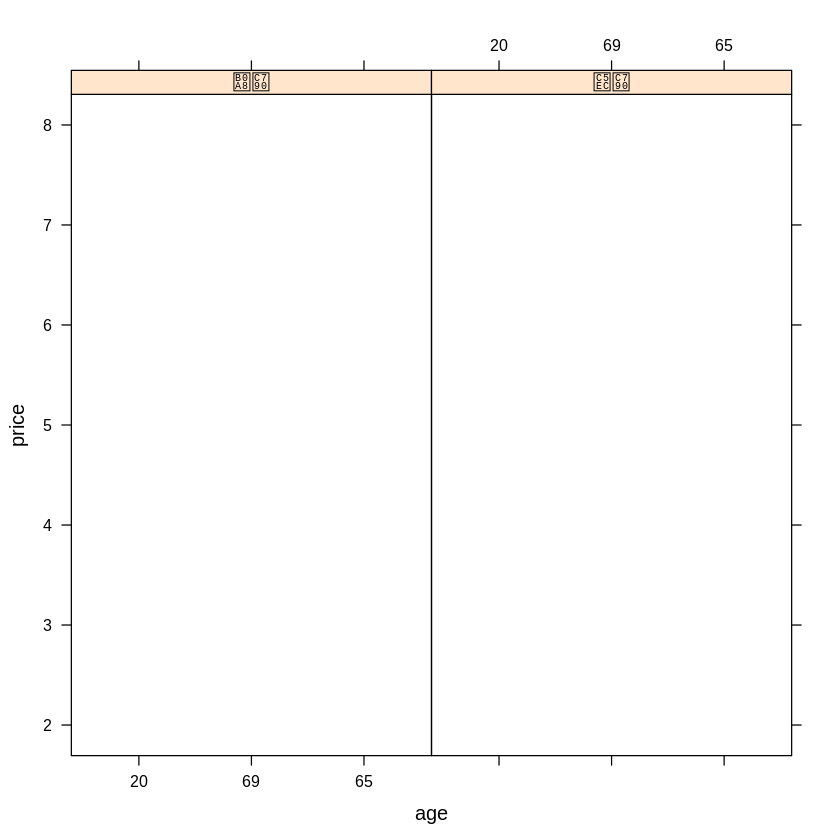

In [44]:
# 연속형(2개, 구매비용, 나이) vs 범주형(1개, 성별)
xyplot(price ~ age | factor(gender2), data = new_data2)